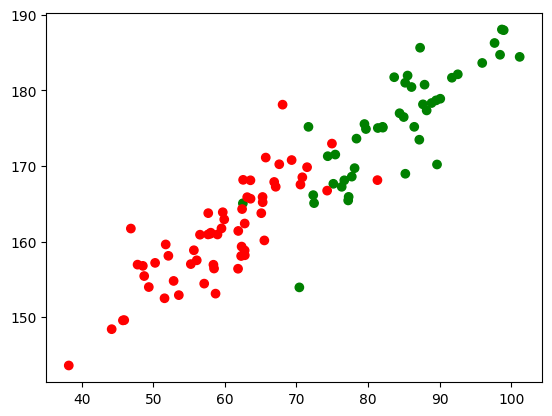

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/weight-height.csv') 
#'Weight': pounds (đơn vị cân nặng là pound)
#'Height': inches (đơn vị chiều cao là inch)
data['Weight'] = data['Weight']*0.45 
data['Height'] = data['Height']*2.54
data.head()
colors = {'Male':'g', 'Female':'r'}
get_color = lambda x: colors[x]
plt.scatter(data['Weight'], data['Height'], c=data['Gender'].apply(get_color))
plt.show()

['Female']


/Users/trunghuynh/miniconda3/envs/ai_class/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


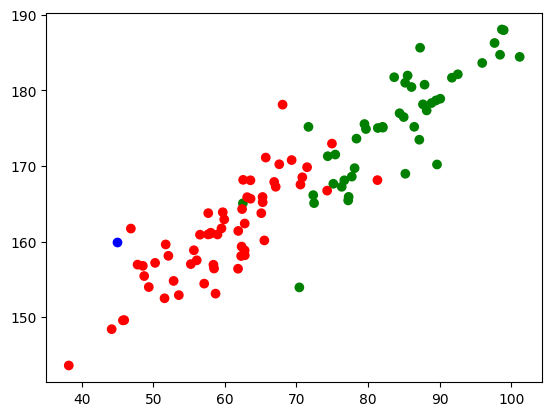

In [21]:
# huấn luyện mô hình
from sklearn.neighbors import KNeighborsClassifier
number_neighbor = 5
neigh = KNeighborsClassifier(n_neighbors=number_neighbor) 
neigh.fit(data[['Weight','Height']], data['Gender'])

height = 160
weight = 45
plt.scatter(data['Weight'], data['Height'], c=data['Gender'].apply(get_color))
plt.scatter(weight,height,c='b')
gender_predict = neigh.predict([[weight,height]])
print(gender_predict)
plt.show()

In [26]:

# return_distance=False chỉ định rằng chúng ta chỉ quan tâm đến các chỉ số hàng xóm gần nhất mà không cần trả về khoảng cách.
# Kết quả trả về là một mảng chứa các chỉ số của các hàng xóm gần nhất. 
# Do neighbors_index là một mảng 2D, nên chúng ta chỉ lấy phần tử đầu tiên ([0]).
neighbors_index = neigh.kneighbors([[weight,height]], number_neighbor, return_distance=False)[0]
print(neighbors_index)
neighbors = data.iloc[neighbors_index]
neighbors

[54 56 63 76 53]


/Users/trunghuynh/miniconda3/envs/ai_class/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Gender,Height,Weight
54,Female,161.741785,46.868202
56,Female,156.969151,47.805159
63,Female,156.807129,48.540093
76,Female,155.460588,48.730547
53,Female,157.201194,50.254290


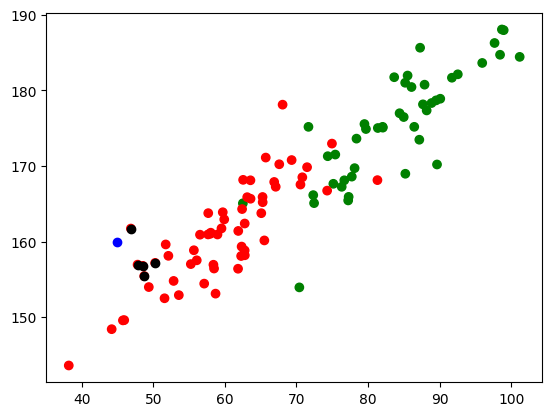

In [27]:
#vẽ điểm gần nhất lên trục toạ độ (k = 5)
plt.scatter(data['Weight'], data['Height'], c = data['Gender'].apply(get_color))
plt.scatter(weight, height, c = 'b')
plt.scatter(neighbors['Weight'], neighbors['Height'], c = 'k')
plt.show()